<h1>1. Setup & Load Data</h1>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h1>Principal Component Analysis (PCA)</h1>

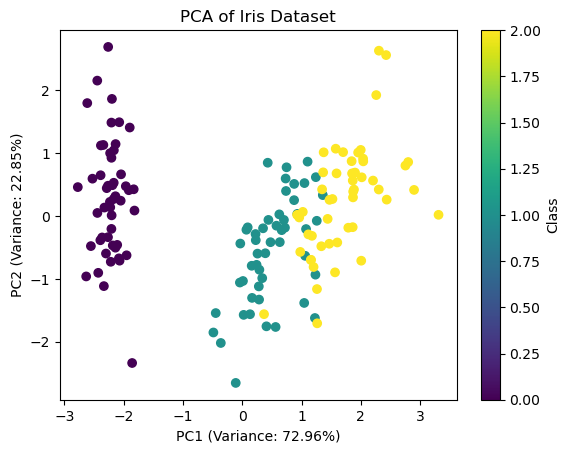

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('PC1 (Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[0]*100))
plt.ylabel('PC2 (Variance: {:.2f}%)'.format(pca.explained_variance_ratio_[1]*100))
plt.title('PCA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

<h1>Linear Discriminant Analysis (LDA)</h1>

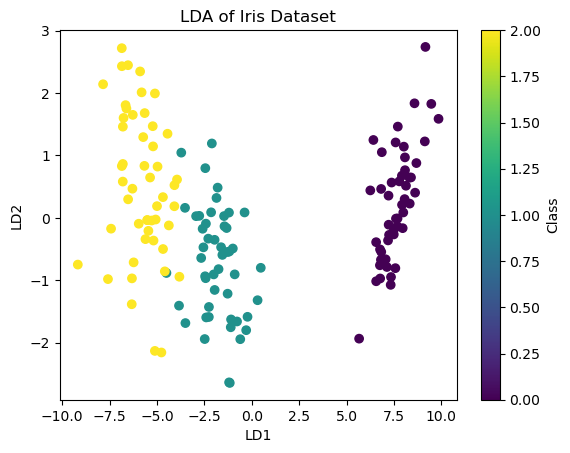

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('LDA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

<h1>t-SNE (t-Distributed Stochastic Neighbor Embedding)</h1>

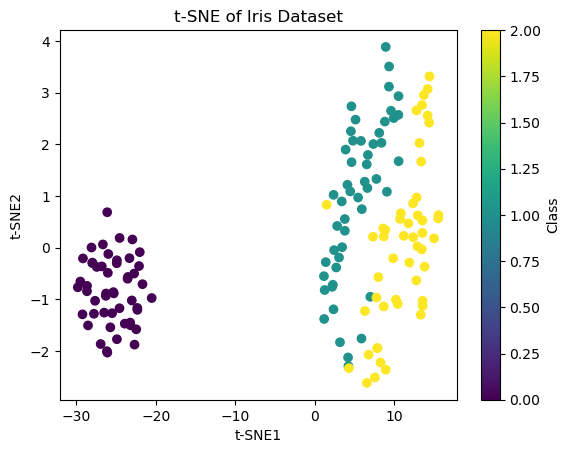

In [12]:
from sklearn.manifold import TSNE

# Apply t-SNE (perplexity=30 is typical)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.title('t-SNE of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

<h1>Independent Component Analysis (ICA)</h1>

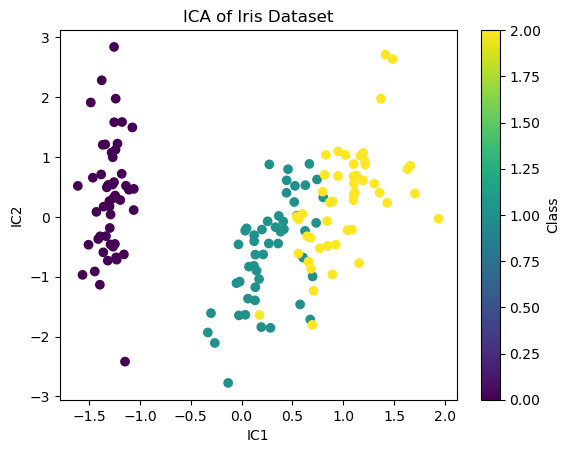

In [16]:
from sklearn.decomposition import FastICA

# Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_scaled)

# Plot
plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='viridis')
plt.xlabel('IC1')
plt.ylabel('IC2')
plt.title('ICA of Iris Dataset')
plt.colorbar(label='Class')
plt.show()

<h1>Feature Selection (SelectKBest)</h1>

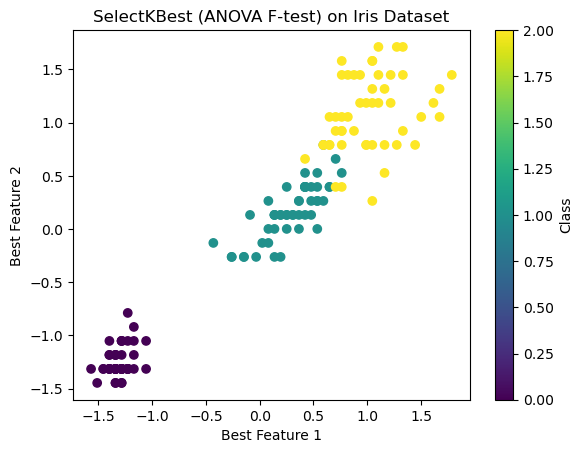

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top 2 features
selector = SelectKBest(score_func=f_classif, k=2)
X_selected = selector.fit_transform(X_scaled, y)

# Plot
plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap='viridis')
plt.xlabel('Best Feature 1')
plt.ylabel('Best Feature 2')
plt.title('SelectKBest (ANOVA F-test) on Iris Dataset')
plt.colorbar(label='Class')
plt.show()

<h1> Impact on Model Performance</h1>

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Original data (4D)
svm = SVC(kernel='rbf')
score_original = cross_val_score(svm, X_scaled, y, cv=5).mean()

# Reduced data (2D PCA)
score_pca = cross_val_score(svm, X_pca, y, cv=5).mean()

print(f"Original (4D) Accuracy: {score_original:.2f}")
print(f"PCA (2D) Accuracy: {score_pca:.2f}")

Original (4D) Accuracy: 0.97
PCA (2D) Accuracy: 0.91


In [ ]:
PCA/LDA are good for general-purpose reduction.

t-SNE is best for visualization.

ICA is useful for signal separation.

Feature selection keeps interpretability.